In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gp
import numpy as np
import os

from shapely.geometry import Point
from geopandas.tools import sjoin

PARQA = os.getenv('PARQA')

In [2]:
def toGeoDataFrame(df, lat='lat',lon='lon'):
    '''dataframe to geodataframe'''
    df[lat].replace(0, np.nan)
    df[lon].replace(0, np.nan)
    df = df[pd.notnull(df[lat])]

    df['geometry'] = df.apply(lambda z: Point(z[lon], z[lat]), axis=1)
    df = gp.GeoDataFrame(df)
    df.crs = {'init': 'epsg:4326', 'no_defs': True}
    return df

In [3]:
df = pd.read_csv(PARQA + '/data/DPR_property/beaches.csv', index_col=0, encoding='utf-8')

In [4]:
df.columns

Index([u'Accessible', u'Accessible_Notes', u'Barbecue_Allowed', u'Bathroom',
       u'Bicycle_and_Skate_Path', u'Boardwalk', u'Concession_Stand',
       u'Description', u'Directions', u'Location', u'Mobile_Charging_Stations',
       u'Name', u'Note', u'Performance_Pavilion', u'Phone', u'Prop_ID',
       u'Surf', u'lat', u'lon'],
      dtype='object')

In [40]:
# df = geocodeDF(df,'ADDRESS')

In [ ]:
df2 = gp.read_file('/Users/casy/Dropbox/CUSP/GRA/data/SHP/DPR_ParksProperties_001/DPR_ParksProperties_001.shp')

In [24]:
df2[df2.SIGNNAME.str.contains('Hunts Point')].head()

,BOROUGH,GISPROPNUM,LOCATION,NYS_ASSEMB,NYS_SENATE,SHAPE_STAr,SHAPE_STLe,SIGNNAME,TYPECATEGO,US_CONGRES,WATERFRONT,geometry
1794,X,X113,Spofford Av bet. Faile St and Hunts Point Av,84,34,31888.413391,734.644517,Hunts Point Playground,Jointly Operated Playground,15,No,"POLYGON ((1015751.40909797 235804.8119045645, ..."
1836,X,X336,Lafayette Av bet. Edgewater Rd and the Bronx R...,"84, 85",34,61111.302338,1347.736517,Hunts Point Riverside Park,Neighborhood Park,15,Yes,"POLYGON ((1017075.433352798 237358.0059766471,..."


/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


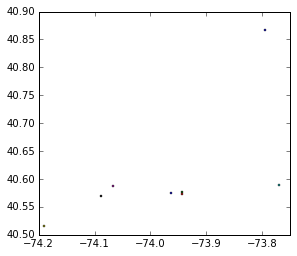

In [5]:
df = toGeoDataFrame(df)
df.plot()

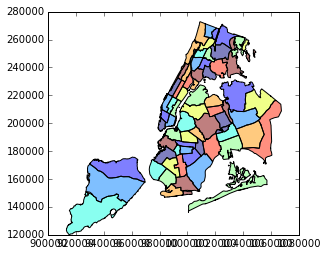

In [6]:
pDistricts = gp.read_file(PARQA + 'data/SHP/Park_Districts/ParkDistrict.shp')
pD = pDistricts[['SYSTEM','geometry']]
pD.plot()

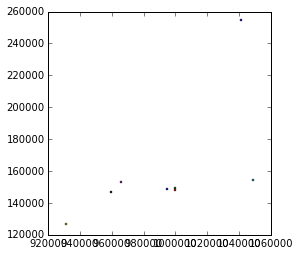

In [8]:
df = df.to_crs(pDistricts.crs)
df.plot()

In [9]:
dfD = sjoin(df, pD, how="left").rename(columns={'SYSTEM':'parkDistrict'}).to_crs(epsg=4326)

In [10]:
def writeGeoJson(gdf,path):
    '''writes df as json'''
    with open(path,'w') as jsFile:
        jsFile.write(gdf.to_json())

In [11]:
writeGeoJson(dfD, PARQA +'data/DPR_property/csv_ll_pD/beaches_pd_ll.geojson')